# Importing Libraries and Modules

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [114]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [91]:
df.shape

(614, 13)

There are 614 rows and 13 columns in the dataset

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see there are missing values and we have object types and int types in our variables

In [93]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit-History

In [94]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

There are 2 unique values or classes in our target variable

In [95]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We have 422 values under Y and 192 values under N. Therefore the class is imbalanced, we will balance it later

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Observation

#1. Null values in LoanAmount, Loan_Amount_Term and Credit_history
#2. Outliers in ApplicantIncome, CoapplicantIncome and LoanAmount

# Univariate Analysis

In [98]:
df_numerical=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

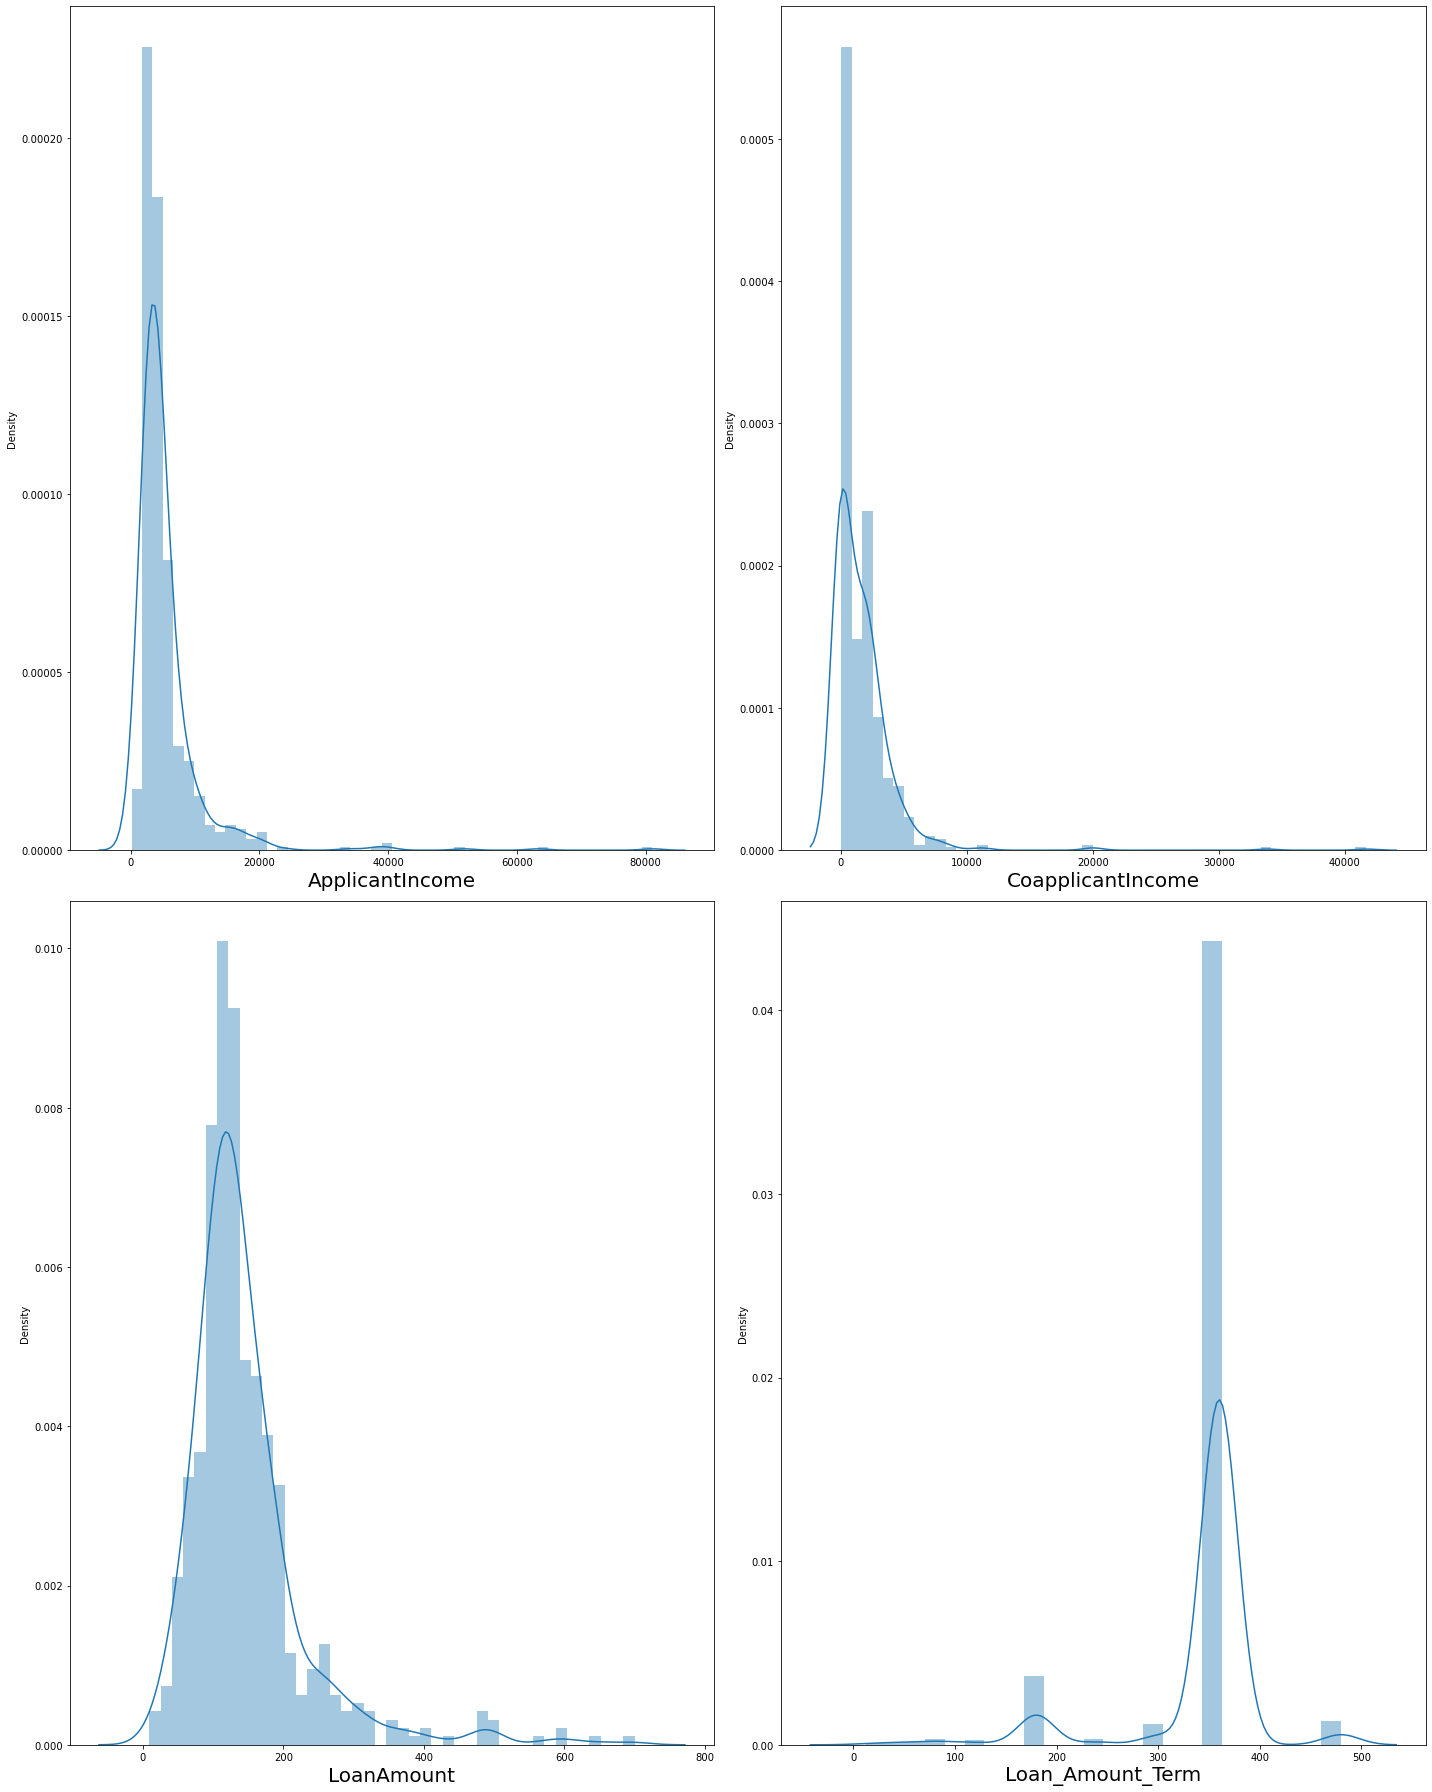

In [99]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df_numerical[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

ApplicantIncome, CoapplicantIncome and LoanAmount are Right skewed whereas Loan_Amount_Term is left skewed

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

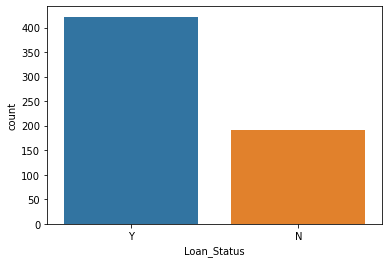

In [100]:
sns.countplot(df['Loan_Status'])

More than 400 loans have been approved whereas around 200 have been rejected

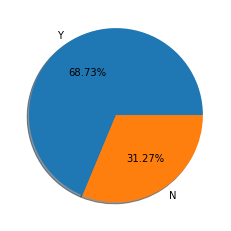

In [102]:
labels='Y','N'

fig,ax=plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

plt.show()

69% of Loans have been approved while 31% of loans rejected

# Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

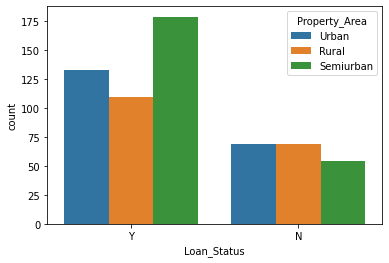

In [109]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=df)

Semiurban areas get maximum loan approves while urban and rural areas get maximum rejection

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

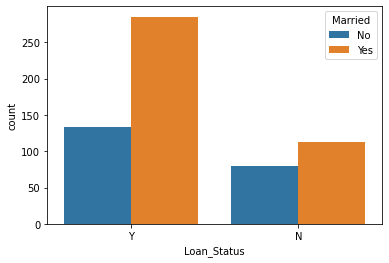

In [110]:
sns.countplot(x='Loan_Status',hue='Married',data=df)

Married people gets their loan approved more than the unmarried ones

# Preprocessing

## Replacing Null Values

In [115]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [116]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We see we have replaced all the null values

In [117]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

Combining both the variables to get the total income of a person

In [118]:
df=df.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)

Dropping these features as they are not important to us

## Encoding

In [121]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['Gender'])
df2=lab_enc.fit_transform(df['Married'])
df3=lab_enc.fit_transform(df['Education'])
df4=lab_enc.fit_transform(df['Self_Employed'])
df5=lab_enc.fit_transform(df['Property_Area'])
df6=lab_enc.fit_transform(df['Dependents'])
df7=lab_enc.fit_transform(df['Loan_Status'])

df['Gender']=df1
df['Married']=df2
df['Education']=df3
df['Self_Employed']=df4
df['Property_Area']=df5
df['Dependents']=df6
df['Loan_Status']=df7

In [122]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


# Multivariate Analysis

In [123]:
#finding out correlation between the features
corr=df.corr()
corr.shape

(11, 11)

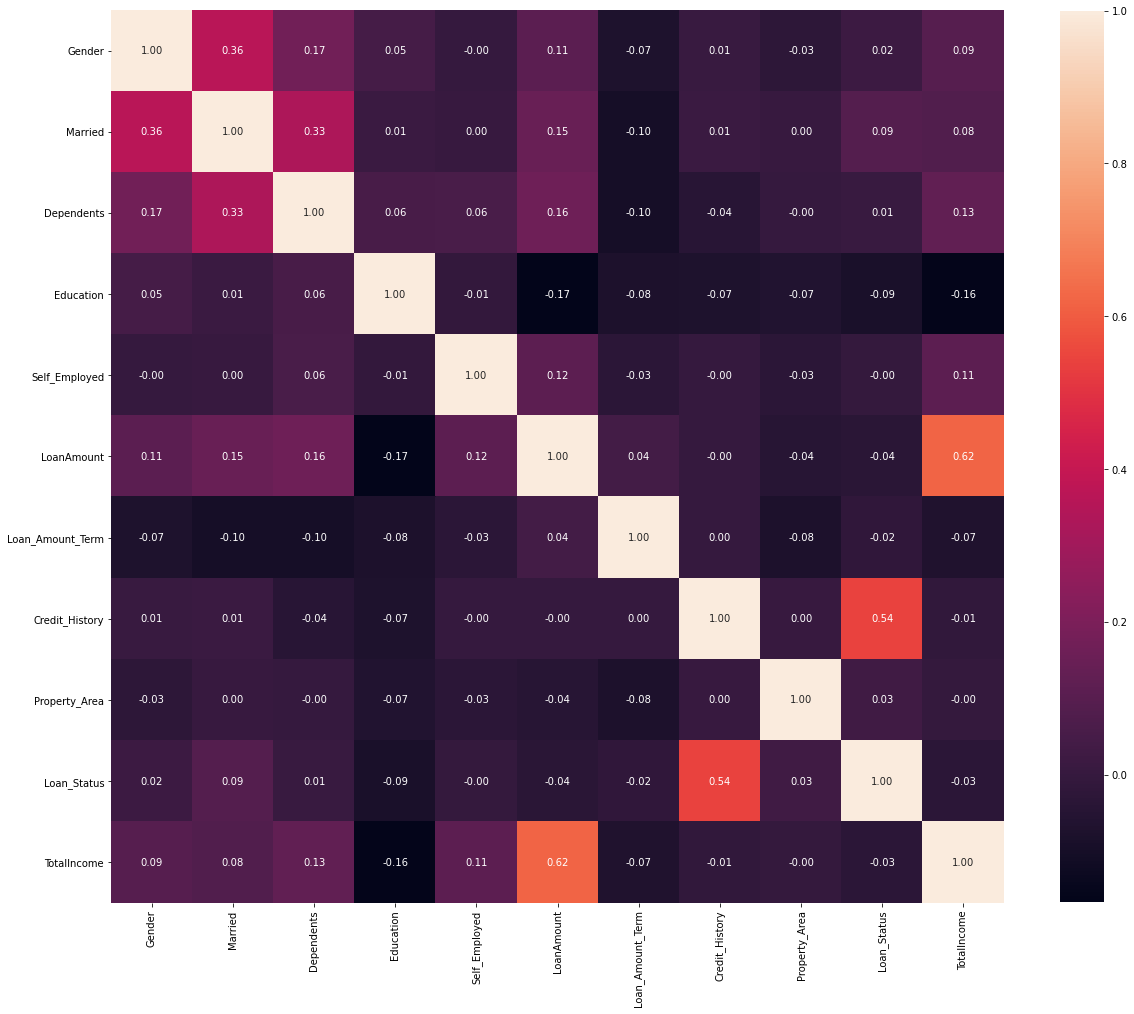

In [124]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We dont see any values highly correlated with target variable

## Finding Outliers

In [130]:
df_outliers=df[['TotalIncome','LoanAmount','Loan_Amount_Term']]

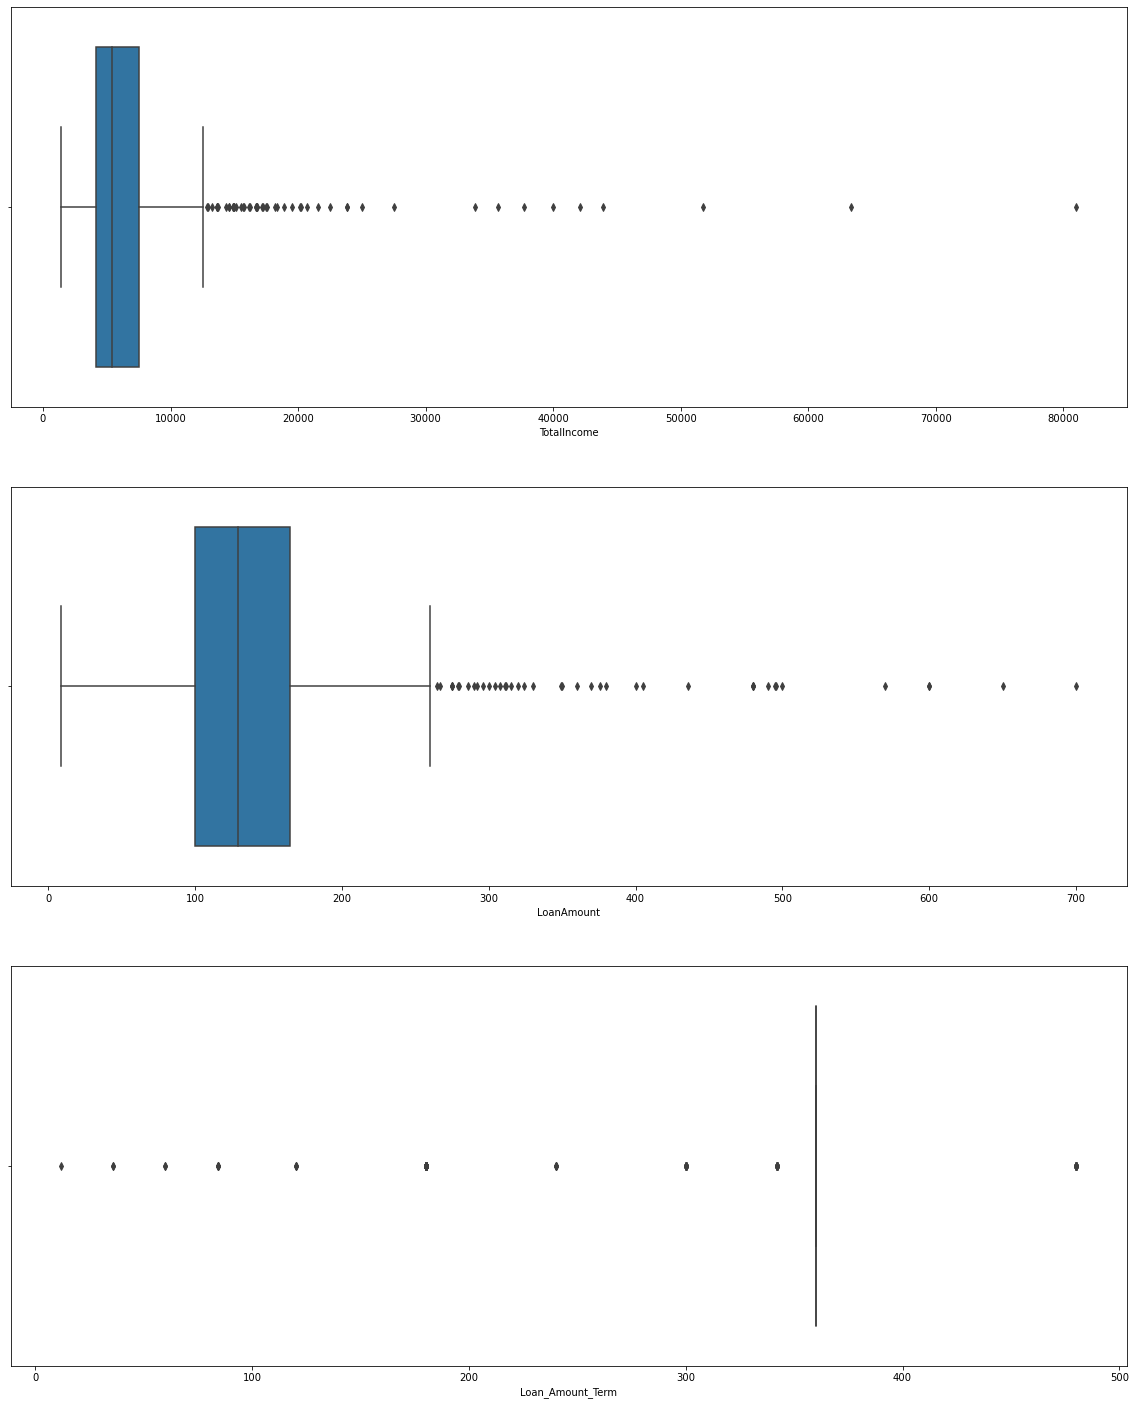

In [131]:
plt.figure(figsize=(20,25))
graph=1

for column in df_outliers:
    if(graph<=3):
        ax=plt.subplot(3,1,graph)
        sns.boxplot(df_outliers[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

There are outliers in TotalIncome, LoanAmount and Loan_Amount_Term

## Removing Outliers

In [132]:
from scipy.stats import zscore

z_score=zscore(df[['TotalIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,0.815835,0.650602,0.724613,0.225473,0.127367,136.938154,347.690189,0.851979,1.030981,0.688468,6202.774389
std,0.387953,0.477191,0.998221,0.418254,0.333670,57.687561,51.650287,0.355426,0.789415,0.463519,3352.771463
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,4160.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,360.000000,1.000000,1.000000,1.000000,5297.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,160.000000,360.000000,1.000000,2.000000,1.000000,7101.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,380.000000,480.000000,1.000000,2.000000,1.000000,23809.000000


In [133]:
df.shape

(581, 11)

In [134]:
(614-581)/614*100

5.374592833876222

Losing around 5% of data which is acceptable

## Checking Skewness

In [135]:
df.skew()

Gender             -1.633836
Married            -0.633385
Dependents          1.042928
Education           1.317262
Self_Employed       2.241256
LoanAmount          1.187261
Loan_Amount_Term   -2.087826
Credit_History     -1.987444
Property_Area      -0.054901
Loan_Status        -0.816015
TotalIncome         2.049400
dtype: float64

There is skewness in LoanAmount, Loan_Amount_Term and TotalIncome

## Removing Skewness

In [136]:
df['LoanAmount'] = np.sqrt(df['LoanAmount'])
df['Loan_Amount_Term'] = np.sqrt(df['Loan_Amount_Term'])
df['TotalIncome'] = np.sqrt(df['TotalIncome'])

In [137]:
df.skew()

Gender             -1.633836
Married            -0.633385
Dependents          1.042928
Education           1.317262
Self_Employed       2.241256
LoanAmount          0.380901
Loan_Amount_Term   -2.468394
Credit_History     -1.987444
Property_Area      -0.054901
Loan_Status        -0.816015
TotalIncome         1.202561
dtype: float64

Loan_Amount_Term and TotalIncome are still skewed

In [61]:
X=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

Splitting the data into independent and dependent variables

In [63]:
#Balancing the class

from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

y.value_counts()

1    400
0    400
Name: Loan_Status, dtype: int64

The target variable is now balanced

In [64]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.260234,Gender
1,1.348973,Married
2,1.161703,Dependents
3,1.072013,Education
4,1.052036,Self_Employed
5,1.816865,LoanAmount
6,1.080573,Loan_Amount_Term
7,1.020961,Credit_History
8,1.025215,Property_Area
9,1.901675,TotalIncome


No collinearity issue

# Model Training

## Finding the best random state

In [65]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.84 on Random State 43


In [66]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=43)

Splitting into Train and Test data

### Checking accuracy by using different models

In [67]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        93
           1       0.87      0.79      0.83       107

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



The accuracy for Decision Tree Classifier is 82%

In [68]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred=RFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        93
           1       0.86      0.88      0.87       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



The accuracy for Random Forest Classifier is 86%

In [69]:
SV=SVC()
SV.fit(X_train,Y_train)
pred=SV.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        93
           1       0.77      0.88      0.82       107

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



The accuracy for Support Vector Classifier is 80%

In [70]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        93
           1       0.78      0.80      0.79       107

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200



The accuracy for Logistic Regression is 78%

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
pred=ada.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        93
           1       0.79      0.87      0.83       107

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



The accuracy for AdaBoost Classifier is 81%

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        93
           1       0.76      0.79      0.77       107

    accuracy                           0.76       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.76      0.75       200



The accuracy for KNeighborsClassifier is 76%

## Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())

0.7775000000000001


In [75]:
print(cross_val_score(RFC,X_scaler,y,cv=5).mean())

0.83375


In [76]:
print(cross_val_score(SV,X_scaler,y,cv=5).mean())

0.74875


In [77]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.7449999999999999


In [78]:
print(cross_val_score(ada,X_scaler,y,cv=5).mean())

0.7725


In [79]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

0.6900000000000001


The difference between Accuracy and Cross validation is the least in RFC, so RFC is our best model

# Hyperparameter Tuning

In [80]:
parameters={'n_estimators':[200,700],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini', 'entropy'],
           'max_depth':[4,5,6,7,8]}

In [81]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [82]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [83]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [84]:
Final_model=RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',max_depth=8)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 84.5


After Hyperparameter tuning, the accuracy is 84.5%, it was 86% earlier due to overfitting of the model.

## Plotting AUC ROC Curve

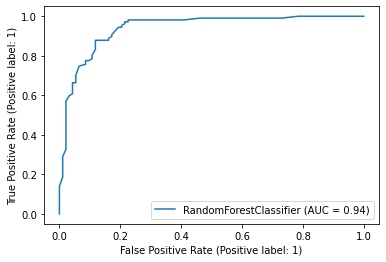

In [85]:
plot_roc_curve(RFC,x_test,y_test)
plt.show()

The AUC score is 0.94

## Confusion matrix

In [87]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [88]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[78, 15],
       [ 9, 98]], dtype=int64)

False Positive and False Negative are in low numbers

# Saving the model

In [139]:
import joblib
joblib.dump(Final_model,"FinalModelLoan.pkl")

['FinalModelLoan.pkl']

## Loading the Model

In [140]:
mod=joblib.load("FinalModelLoan.pkl")
prediction=mod.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction.to_csv('ResultsLoan.csv',index=False)